In [3]:
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('/home/melissa/PROJECT_DIRECTORIES/ef1_alpha_analysis/scripts')
%run plotting.py

In [54]:
os.chdir('/home/melissa/RESULTS/EF1_alpha_seizure_power/')
seizure = pd.read_csv('test_seizure_df_ef1.csv')
seizure_freq = pd.read_csv('test_newfreq_seizure_df_ef1.csv')
new_time_stamps = pd.read_csv('test_add5seconds_seizure_df_ef1.csv')

In [55]:
new_time_stamps

,Unnamed: 0,Animal_ID,Headstage,Channel,Power,Frequency,Genotype
0,0,191217B,B,18,3.630031e+00,0.00,EF1
1,1,191217B,B,18,8.218074e+00,0.04,EF1
2,2,191217B,B,18,1.832036e+01,0.08,EF1
3,3,191217B,B,18,2.468554e+01,0.12,EF1
4,4,191217B,B,18,5.498956e+01,0.16,EF1
...,...,...,...,...,...,...,...
160059,2496,191125A,A,9,2.868981e-18,99.84,WT
160060,2497,191125A,A,9,2.866831e-18,99.88,WT
160061,2498,191125A,A,9,2.865288e-18,99.92,WT
160062,2499,191125A,A,9,2.864366e-18,99.96,WT


In [13]:
mutants = ['191217B','210706A', '191216A', '210705B','191217A', '210705A', '210706D', '210705D', '210430C', 
           '191216B','210706B','210705D', '191217B','210429C', '191217A','210705B']
print(len(mutants))
wildtypes = ['191216C', '191125A']

16


In [23]:
seizure_freq['Channel'].unique()

array([18, 19, 23, 25,  2,  3,  7,  9, 50, 51, 55, 57, 34, 35, 39, 41])

In [25]:
animal_id_ls = seizure_freq['Animal_ID'].unique()

In [63]:
df_plot = seizure.loc[new_time_stamps['Animal_ID'] == str(animal)]
df_plot

,Unnamed: 0,Animal_ID,Headstage,Channel,Power,Frequency,Genotype
150060,0,191125A,A,2,7.733612e+01,0.00,WT
150061,1,191125A,A,2,5.135443e+02,0.04,WT
150062,2,191125A,A,2,1.178903e+02,0.08,WT
150063,3,191125A,A,2,5.738470e+02,0.12,WT
150064,4,191125A,A,2,2.467922e+02,0.16,WT
...,...,...,...,...,...,...,...
160059,2496,191125A,A,9,2.868981e-18,99.84,WT
160060,2497,191125A,A,9,2.866831e-18,99.88,WT
160061,2498,191125A,A,9,2.865288e-18,99.92,WT
160062,2499,191125A,A,9,2.864366e-18,99.96,WT


In [64]:
10004/2501

4.0

In [67]:
divisor = len(df_plot)/2501

In [72]:
2501 + 2501

5002

In [73]:
0, 2501, 5002, len(df_plot)

(0, 2501, 5002, 10004)

In [79]:
seizure_indices = np.arange(0, len(df_plot) + 2501, 2501)

array([    0,  2501,  5002,  7503, 10004])

## Plot total average 

KeyboardInterrupt: 

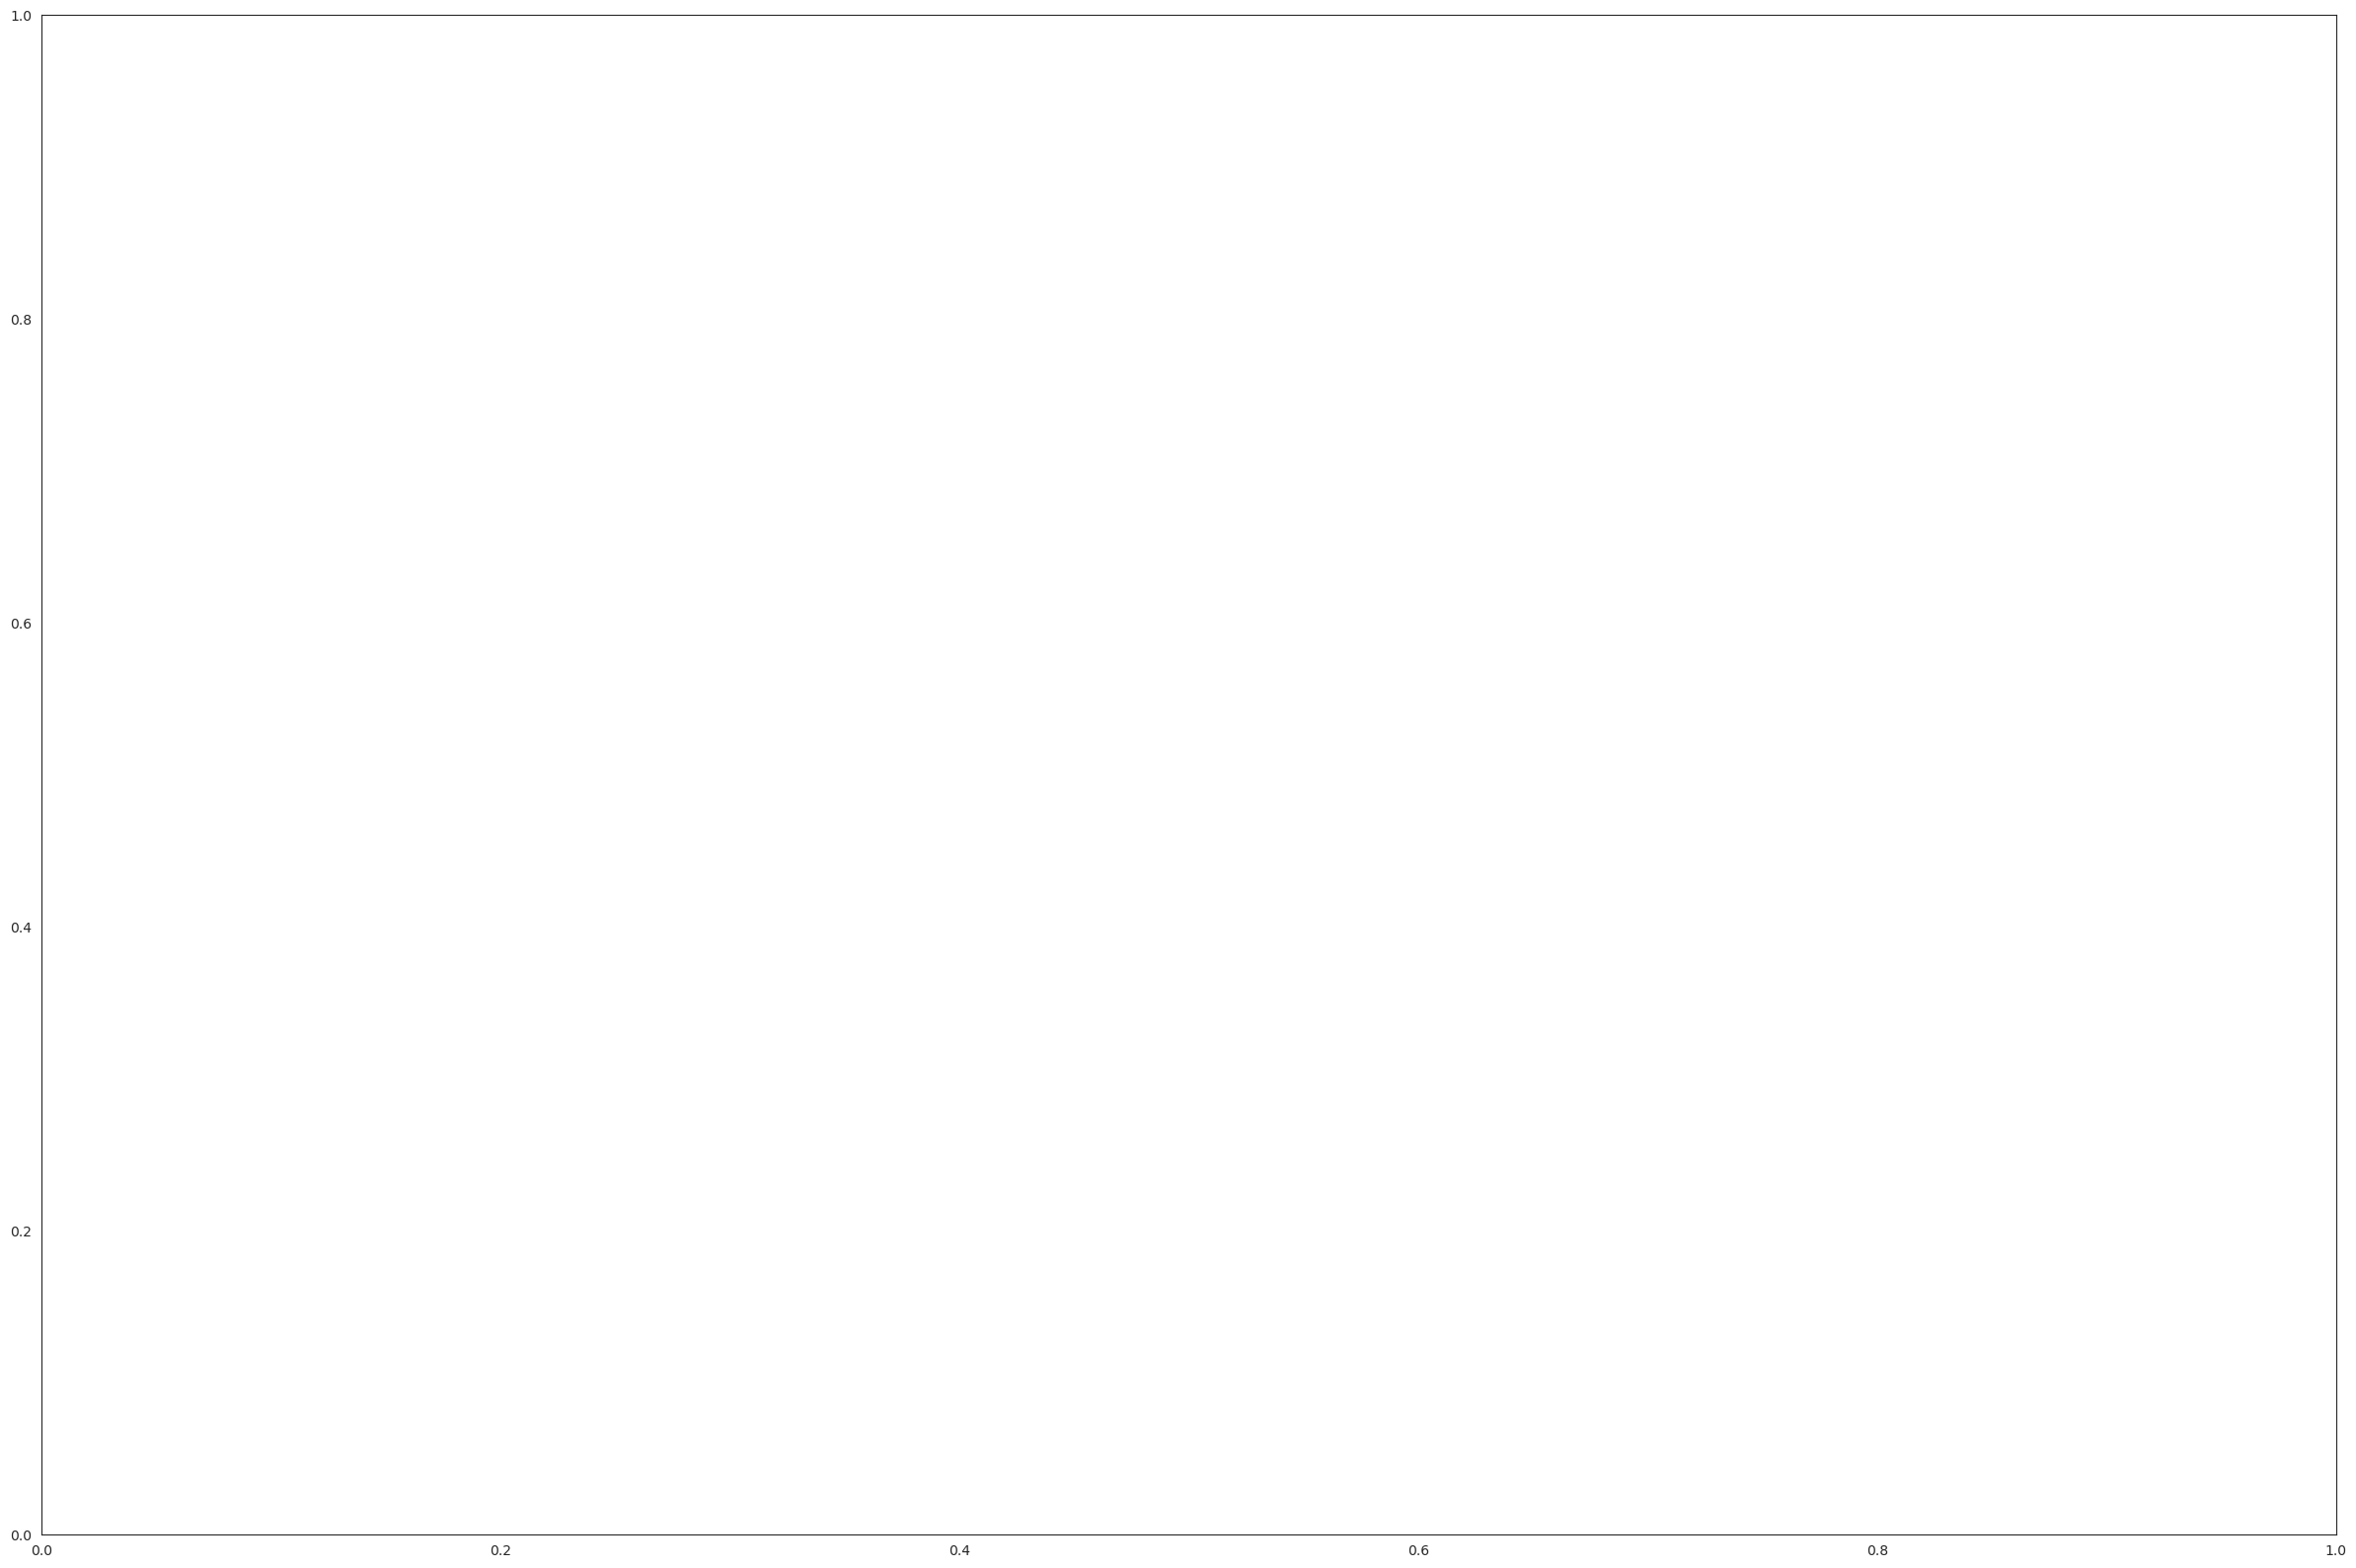

In [80]:
for animal in animal_id_ls:
    df_plot = new_time_stamps.loc[new_time_stamps['Animal_ID'] == str(animal)]
    sns.set_style("white") 
    fig, axs = plt.subplots(1,1, figsize=(30,20))
    sns.lineplot(data=df_plot, x='Frequency', y='Power', hue='Channel')
    plt.suptitle(str(animal) + ' spike times', fontsize = 30, fontweight = 'bold') 
    sns.despine()
    plt.yscale('log')
    axs.set_xlim(1, 99)
    axs.set(xlabel = 'Frequency')
    axs.set(ylabel = 'PSD [V**2/Hz]')
    #plt.savefig('/home/melissa/RESULTS/EF1_alpha_seizure_power/SPIKE_TIME_PLOTS/individual_seizures/' + str(animal)+ '_seizure.jpg')
    #plt.clf()

In [90]:
for animal in animal_id_ls:
    df_plot = seizure_freq.loc[seizure_freq['Animal_ID'] == str(animal)]
    seizure_len = len(df_plot)
    print(seizure_len)
    seizure_indices = np.arange(0, seizure_len + 2501, 2501)
    print(seizure_indices)
    for idx, seizure_idx in enumerate(seizure_indices):
        start_idx = seizure_idx
        next_idx = seizure_indices[idx + 1]  
        seizure_df = df_plot.iloc[start_idx:next_idx + 1, :]
        sns.set_style("white") 
        fig, axs = plt.subplots(1,1, figsize=(10,8))
        sns.lineplot(data=seizure_df, x='Frequency', y='Power', hue='Channel')
        plt.suptitle(str(animal) + ' spike times', fontsize = 30, fontweight = 'bold') 
        sns.despine()
        plt.yscale('log')
        axs.set_xlim(1, 99)
        axs.set(xlabel = 'Frequency')
        axs.set(ylabel = 'PSD [V**2/Hz]')
        plt.savefig('/home/melissa/RESULTS/EF1_alpha_seizure_power/SPIKE_TIME_PLOTS/individual_seizures/' + str(animal)+ '_' + str(idx) + '_seizure.jpg')
        plt.clf()

20008
[    0  2501  5002  7503 10004 12505 15006 17507]


IndexError: index 8 is out of bounds for axis 0 with size 8

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [14]:
mutant_array = np.unique(np.array(mutants))
unique_mutants = list(mutant_array)
len(unique_mutants)

12

In [37]:
test_channel = df_plot.loc[df_plot['Channel'] == 18]

In [47]:
test_plot = test_channel.iloc[0:2502, :]

[Text(0, 0.5, 'PSD [V**2/Hz]')]

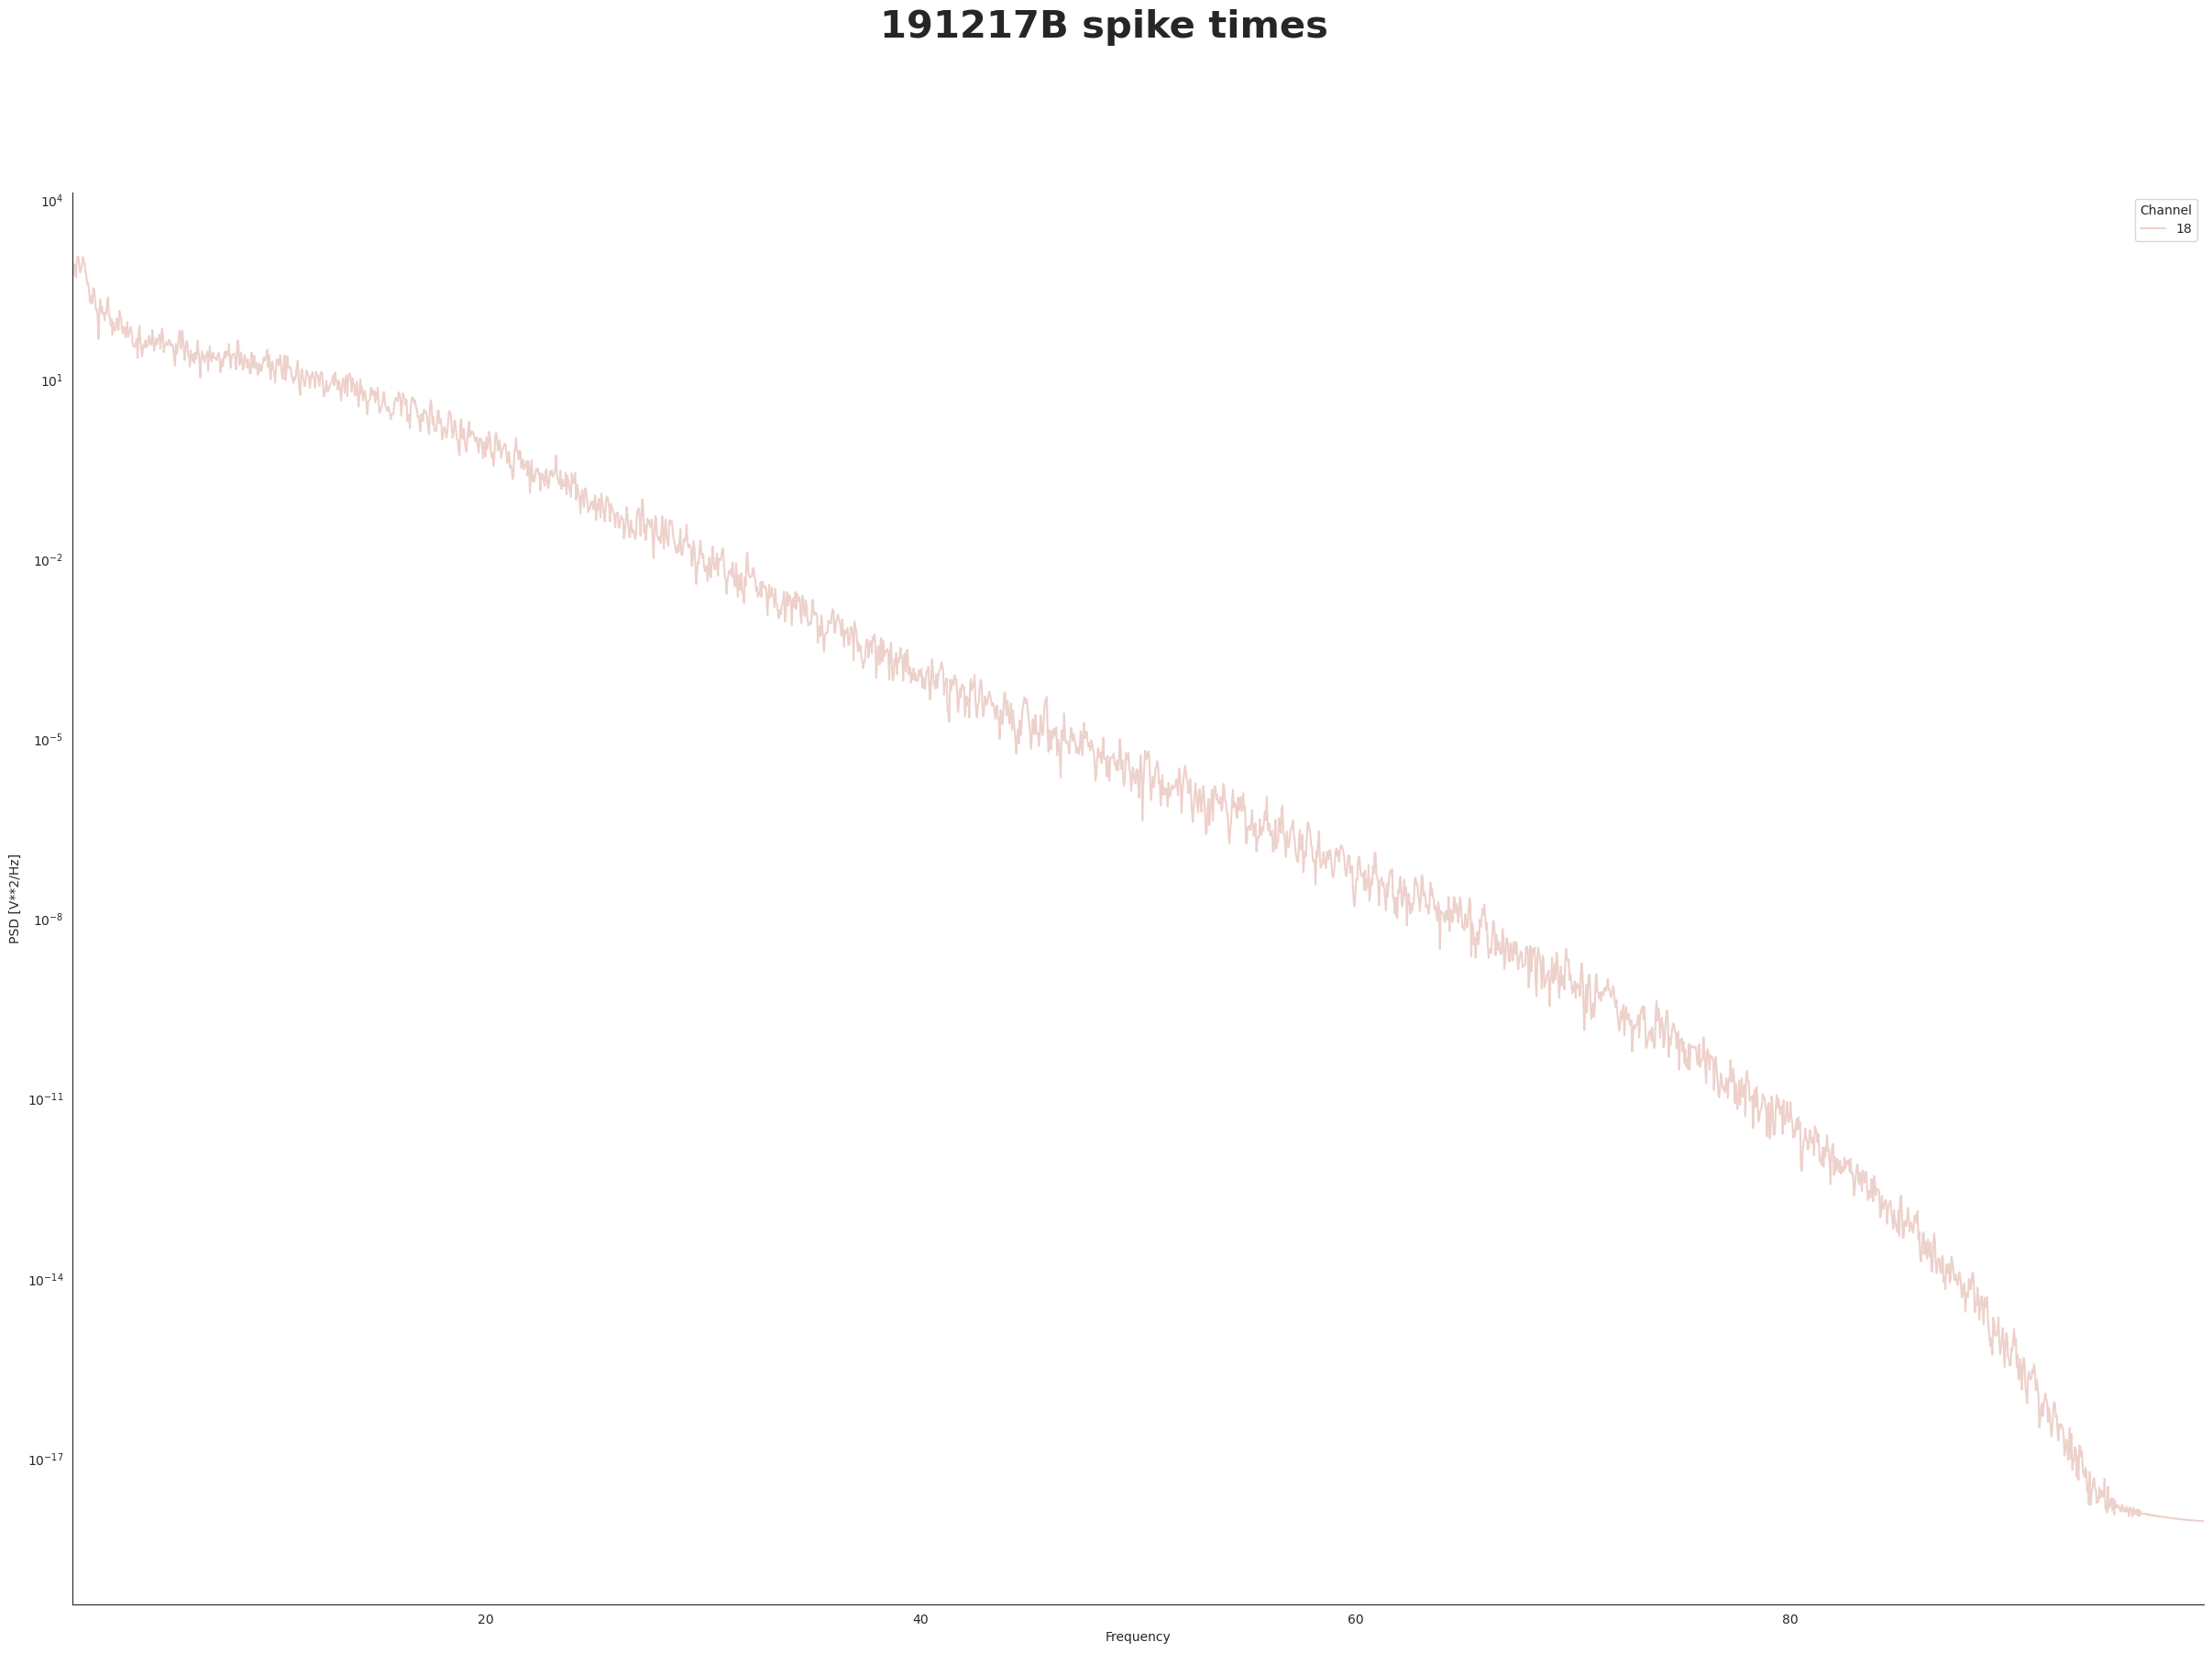

In [50]:
sns.set_style("white") 
fig, axs = plt.subplots(1,1, figsize=(30,20))
sns.lineplot(data=test_plot, x='Frequency', y='Power', hue='Channel')
plt.suptitle(str(animal) + ' spike times', fontsize = 30, fontweight = 'bold') 
sns.despine()
plt.yscale('log')
axs.set_xlim(1, 99)
axs.set(xlabel = 'Frequency')
#axs.set_ylim(10**-2, 10**5)
axs.set(ylabel = 'PSD [V**2/Hz]')
